In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE,f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [3]:
house=pd.read_csv("kc_house_data.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [5]:
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
house=house.drop(["id","date"],axis=1)

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\anaconda\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


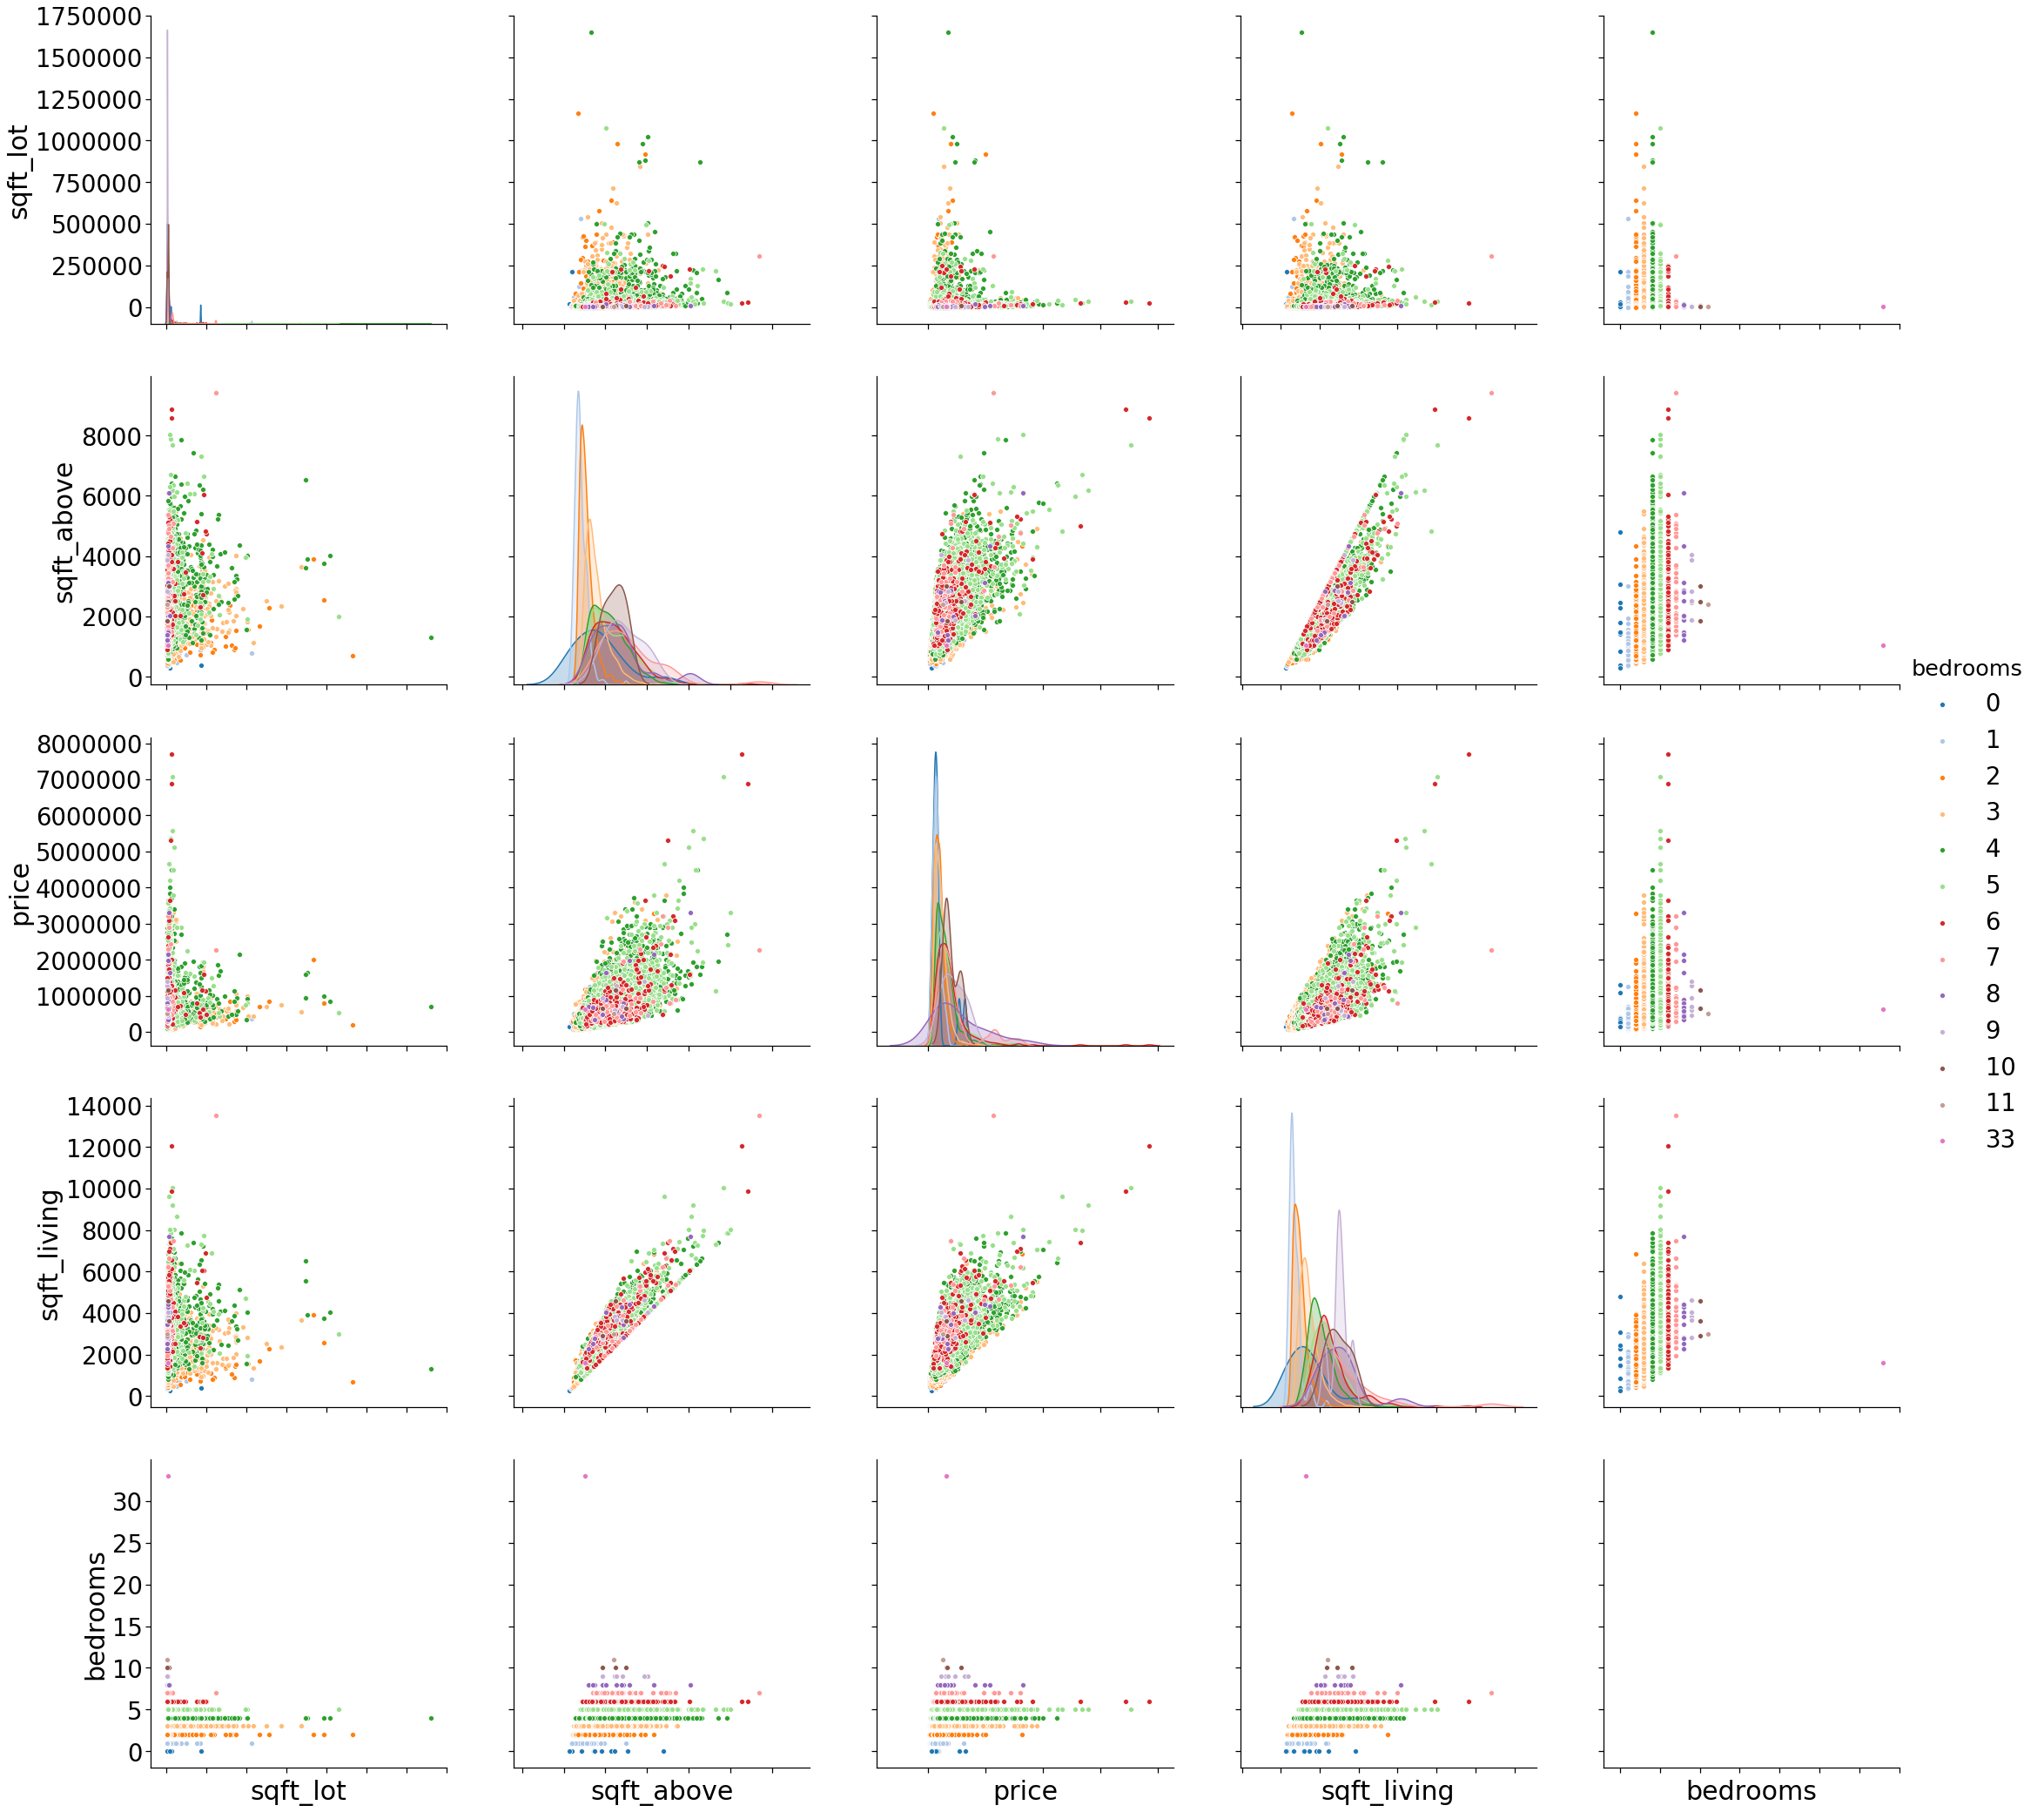

In [7]:
with sns.plotting_context("notebook",font_scale=2.5):
    g=sns.pairplot(house[["sqft_lot","sqft_above","price","sqft_living","bedrooms"]],hue="bedrooms",palette="tab20",size=6)
g.set(xticklabels=[])

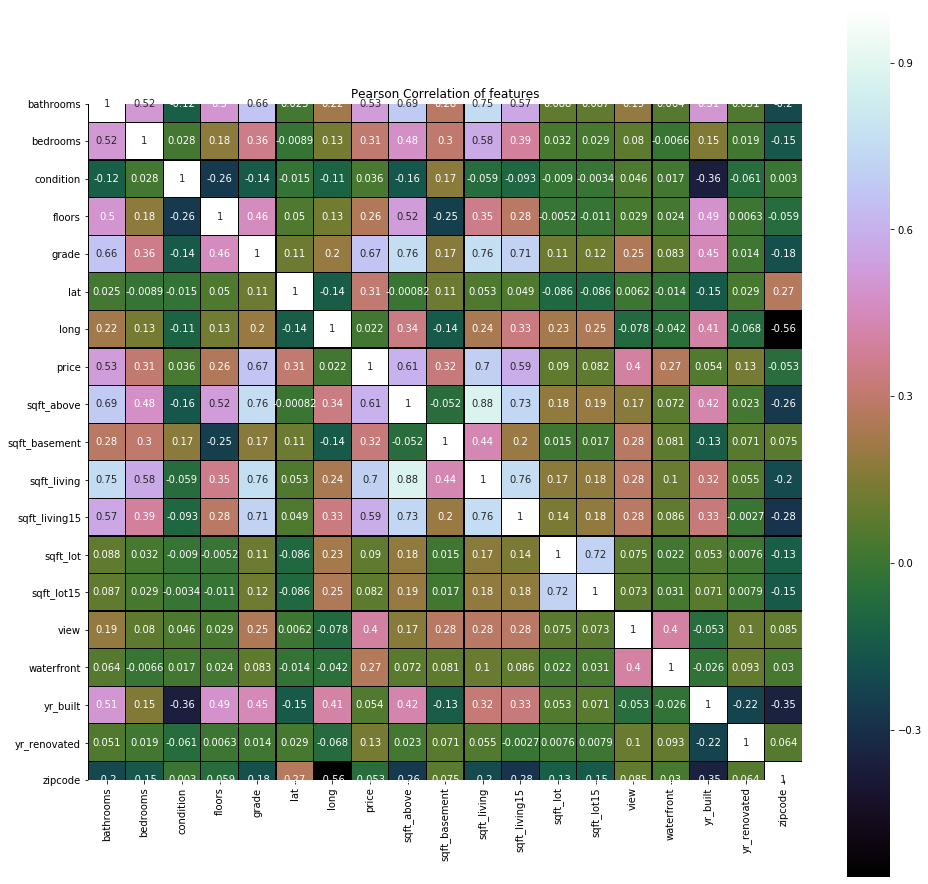

In [10]:
str_list=[]
for colname,colvalue in house.iteritems():
    if type(colvalue[1])==str:
        str_list.append(colname)

num_list=house.columns.difference(str_list)
house_num=house[num_list]

f,ax=plt.subplots(figsize=(16,16))
plt.title("Pearson Correlation of features")
sns.heatmap(house_num.astype(float).corr(),linewidth=0.25,vmax=1.0,square=True,cmap="cubehelix",linecolor="k",annot=True)

In [11]:
Y=house.price.values
house=house.drop(["price"],axis=1)
X=house.as_matrix()
colnames=house.columns

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
ranks={}

def ranking(ranks,names,order=1):
    minmax=MinMaxScaler()
    ranks=minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks=map(lambda x:round(x,2),ranks)
    return dict(zip(names,ranks))

In [14]:
lr=LinearRegression(normalize=True)
lr.fit(X,Y)
rfe=RFE(lr,n_features_to_select=1,verbose=3)
rfe.fit(X,Y)
ranks["RFE"]=ranking(list(map(float,rfe.ranking_)),colnames,order=-1)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [15]:
lr=LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"]=ranking(np.abs(lr.coef_),colnames)

ridge=Ridge(alpha=7)
ridge.fit(X,Y)
ranks["Ridge"]=ranking(np.abs(ridge.coef_),colnames)

lasso=Lasso(alpha=.05)
lasso.fit(X,Y)
ranks["Lasso"]=ranking(np.abs(lasso.coef_),colnames)

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398224415898727.5, tolerance: 291291676192.12994
  positive)


In [16]:
rf=RandomForestRegressor(n_jobs=-1,n_estimators=50,verbose=3)
rf.fit(X,Y)
ranks["RF"]=ranking(rf.feature_importances_,colnames)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50
building tree 2 of 50building tree 3 of 50
building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50building tree 14 of 50

building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s


building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.9s finished


In [18]:
r={}
for name in colnames:
    r[name]=round(np.mean([ranks[method][name] for method in ranks.keys()]),2)
    
methods=sorted(ranks.keys())
ranks["Mean"]=r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str,[ranks[method][name] for method in methods]))))

	Lasso	LinReg	Mean	RF	RFE	Ridge	Mean
bedrooms	0.06	0.06	0.15	0.0	0.59	0.06	0.15
bathrooms	0.07	0.07	0.19	0.01	0.71	0.07	0.19
sqft_living	0.0	0.0	0.23	0.82	0.35	0.0	0.23
sqft_lot	0.0	0.0	0.01	0.04	0.0	0.0	0.01
floors	0.01	0.01	0.1	0.0	0.47	0.01	0.1
waterfront	0.97	0.97	0.79	0.09	1.0	0.94	0.79
view	0.09	0.09	0.21	0.03	0.76	0.09	0.21
condition	0.04	0.04	0.15	0.0	0.65	0.04	0.15
grade	0.16	0.16	0.47	1.0	0.88	0.16	0.47
sqft_above	0.0	0.0	0.07	0.06	0.29	0.0	0.07
sqft_basement	0.0	0.0	0.05	0.01	0.24	0.0	0.05
yr_built	0.0	0.0	0.12	0.08	0.53	0.0	0.12
yr_renovated	0.0	0.0	0.02	0.0	0.12	0.0	0.02
zipcode	0.0	0.0	0.09	0.04	0.41	0.0	0.09
lat	1.0	1.0	0.89	0.5	0.94	1.0	0.89
long	0.36	0.36	0.42	0.22	0.82	0.35	0.42
sqft_living15	0.0	0.0	0.05	0.09	0.18	0.0	0.05
sqft_lot15	0.0	0.0	0.02	0.04	0.06	0.0	0.02


In [19]:
meanplot=pd.DataFrame(list(r.items()),columns=["Feature","Mean Ranking"])
meanplot=meanplot.sort_values("Mean Ranking",ascending=False)

C:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


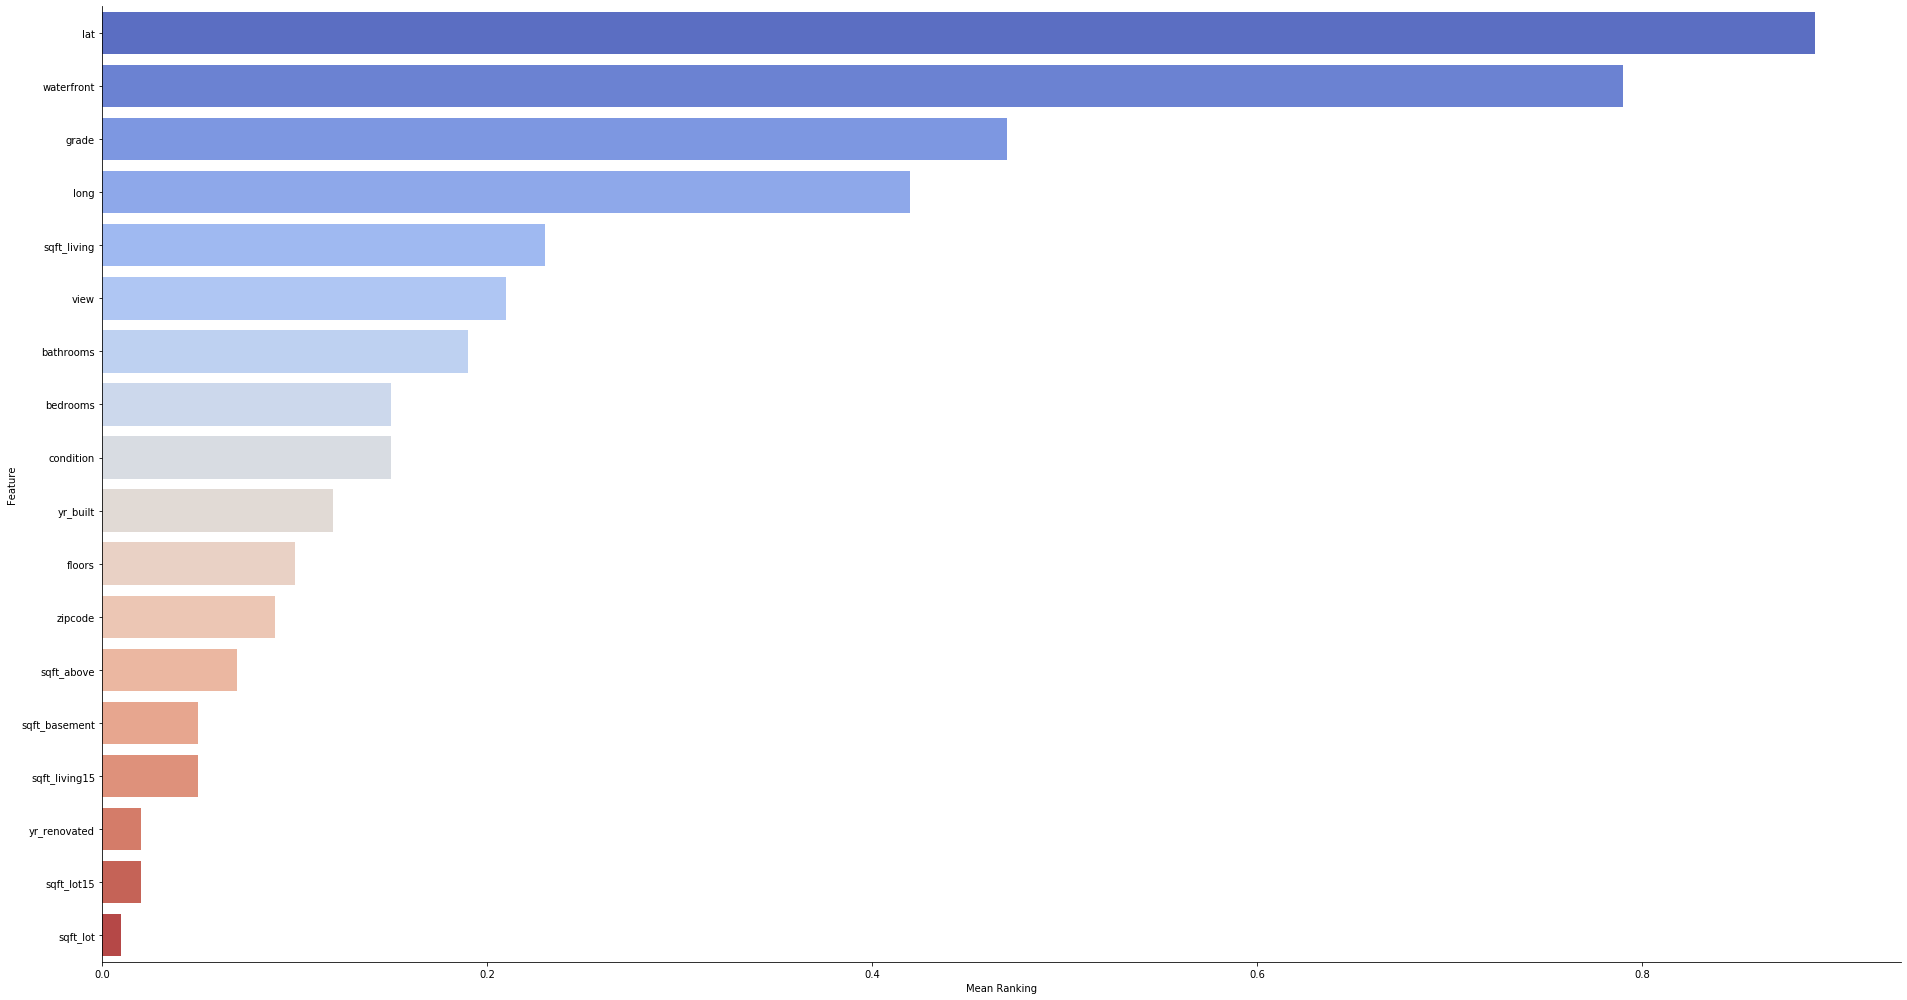

In [20]:
sns.factorplot(x="Mean Ranking",y="Feature",data=meanplot,kind="bar",
              size=14,aspect=1.9,palette="coolwarm")